In [106]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


with open('experiment.out') as fh:
    out = fh.read()

out = re.split(r'\n\n\n', out); out[0]; out.pop()

''

In [107]:
def find_numbers(x):
    rawlist = re.findall(r'(\d+)\s|(\d+)\.(\d+)', x)
    numlist = []
    for g in rawlist:
        if g[0] != '':
            numlist.append(float(g[0]))
        if g[1] != '':
            numlist.append(float(g[1]+'.'+g[2]))
    return numlist[:8]+numlist[10:]

In [108]:
def dictionary_creator(x):
    return_dict = dict()
    var = ['n-source','n-target','dimension','prop-of-success-target','dist-between-means','iter_index','prediction_error','bayes_error','w_error','bandwidth','target_proportion','target_prop_error']
    for index, num in zip(var, x):
        return_dict[index] = num
    return return_dict

In [109]:
out_list = [find_numbers(x) for x in out]

In [110]:
df_out = pd.DataFrame(out_list, columns=['n-source','n-target','dimension','target-prop','dist-between-means','iter-index','prediction-error','bayes-error','w-error','bandwidth','target-prop','target-prop-error','NaN'])
df_out = df_out.iloc[:9901, :-1]
df_out['excess-risk'] = np.absolute(df_out['prediction-error'] - df_out['bayes-error'])

In [111]:
df_out

,n-source,n-target,dimension,target-prop,dist-between-means,iter-index,prediction-error,bayes-error,w-error,bandwidth,target-prop,target-prop-error,excess-risk
0,200.0,500.0,3.0,0.8,0.5,2.0,0.300,0.210,0.427299,0.579798,0.568889,0.231111,0.090
1,200.0,500.0,5.0,0.7,0.6,21.0,0.269,0.270,0.112812,1.616162,0.581250,0.118750,0.001
2,200.0,500.0,3.0,0.7,0.5,1.0,0.384,0.281,0.077845,0.637374,0.504599,0.195401,0.103
3,200.0,500.0,3.0,0.7,0.7,35.0,0.359,0.291,0.049508,0.349495,0.621333,0.078667,0.068
4,200.0,500.0,3.0,0.6,0.7,34.0,0.423,0.373,0.106002,1.750505,0.694445,0.094445,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,100.0,500.0,5.0,0.8,0.5,24.0,0.673,0.226,1.106438,1.300000,0.418138,0.381862,0.447
9897,100.0,500.0,5.0,0.8,0.8,24.0,0.274,0.192,0.295619,1.300000,0.546651,0.253349,0.082
9898,100.0,500.0,5.0,0.7,0.8,24.0,0.306,0.259,0.003244,1.000000,0.725279,0.025279,0.047
9899,100.0,500.0,5.0,0.8,0.7,49.0,0.187,0.184,0.050494,1.300000,0.826667,0.026667,0.003


Text(0.5, 0.98, '')

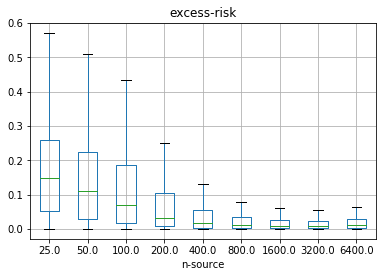

In [112]:
box = df_out.boxplot(column=['excess-risk'],by = 'n-source', showfliers='')
#box.set_yscale('log')
plt.suptitle('')

Text(0.5, 0.98, '')

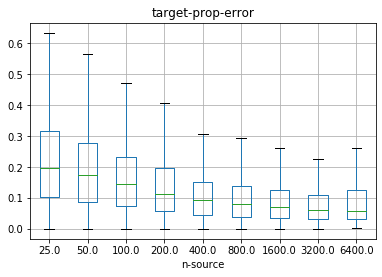

In [113]:
box = df_out.boxplot(column=['target-prop-error'],by = 'n-source', showfliers='')
plt.suptitle('')